In [47]:
import pandas as pd
import numpy as np



In [48]:
# Load the dataset
dataset = pd.read_csv("C:\\Users\\HP\\Downloads\\large_employee_attrition_dataset.csv")
dataset


,EmployeeID,Age,Gender,Department,JobRole,Tenure,PerformanceRating,SatisfactionScore,WorkLifeBalance,Salary,AttritionStatus,ReasonForAttrition,JobDept_Interaction,HighRisk
0,-1.730320,0.640905,-0.926680,0.847310,1.326558,0.940490,1.248849,-1.450979,-1.211377,-0.146096,1.484967,3.057539,2.173867,Yes
1,-1.706071,0.552553,-0.926680,0.258491,-0.281781,-1.389463,-1.183184,-0.439844,-1.211377,-0.950303,1.484967,0.236931,-0.023290,Yes
2,-1.699143,-1.214486,-0.926680,1.436128,-0.281781,-1.165097,0.032832,-1.450979,0.012236,-1.030561,1.484967,0.942083,1.154347,Yes
3,-1.688750,0.375849,-0.926680,-0.919146,-1.246784,0.992266,0.032832,0.795988,1.235850,-0.401968,1.484967,-0.468221,-2.165930,Yes
4,-1.681822,-1.037782,-0.926680,1.436128,-0.281781,0.836936,-1.183184,-0.889237,-1.211377,1.535577,1.484967,0.942083,1.154347,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,1.674894,0.464201,1.079121,0.258491,1.004890,-1.527534,1.248849,1.582427,1.235850,0.616715,1.484967,-0.468221,1.263381,Yes
308,1.681822,-1.126134,-0.926680,1.436128,-0.281781,1.044043,0.032832,-0.327495,0.012236,1.707293,1.484967,-0.468221,1.154347,Yes
309,1.702607,-0.330966,-0.926680,-0.919146,-1.246784,1.078561,0.032832,0.121898,0.012236,0.131913,1.484967,-0.468221,-2.165930,Yes
310,1.719927,-0.772726,1.079121,-0.330327,1.648226,-1.113320,-1.183184,0.795988,1.235850,-0.931156,1.484967,-0.468221,1.317898,Yes


In [5]:
# Check for missing values
dataset.isnull().sum()

# Get basic statistics of numerical columns
dataset.describe()

# Count unique values in categorical columns
dataset['AttritionStatus'].value_counts()
dataset['Department'].value_counts()

Department
-0.919146    69
 0.847310    57
 1.436128    54
 0.258491    50
-0.330327    47
-1.507964    35
Name: count, dtype: int64

In [8]:
!pip install dash

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [42]:
import dash
from dash import dcc, html
import plotly.express as px

# Initialize the Dash app
app = dash.Dash(__name__)

# Create visualizations
# 1. Attrition Rate (Pie Chart)
attrition_pie = px.pie(dataset, names='AttritionStatus', title='Employee Attrition')

# 2. Age Distribution (Histogram)
age_hist = px.histogram(dataset, x='Age', nbins=20, title='Age Distribution')

# 3. Tenure vs. Attrition (Box plot)
tenure_box = px.box(dataset, x='AttritionStatus', y='Tenure', title='Tenure vs. Attrition')

# 4. Salary Distribution (Histogram)
salary_hist = px.histogram(dataset, x='SatisfactionScore', nbins=20, title='Salary')

# 5. Department-wise Attrition (Bar chart)
department_attrition = px.bar(dataset.groupby('Department')['AttritionStatus'].value_counts().unstack().fillna(0).T,
                              title='Attrition by Department')

# Layout for the dashboard
app.layout = html.Div([
    html.H1("Employee Attrition Dashboard"),
    html.Div([
        dcc.Graph(figure=attrition_pie),
        dcc.Graph(figure=age_hist),
    ], style={'display': 'flex', 'flex-wrap': 'wrap', 'justify-content': 'space-around'}),
    html.Div([
        dcc.Graph(figure=tenure_box),
        dcc.Graph(figure=salary_hist),
    ], style={'display': 'flex', 'flex-wrap': 'wrap', 'justify-content': 'space-around'}),
    dcc.Graph(figure=department_attrition),
])

# Run the server
if __name__ == '__main__':
    app.run_server(debug=True)


In [41]:
import dash
from dash import dcc, html
import pandas as pd
import plotly.express as px
from dash.dependencies import Input, Output

# Load your data
dataset = pd.read_csv("C:\\Users\\HP\\Downloads\\large_employee_attrition_dataset.csv")

# Initialize the Dash app
app = dash.Dash(__name__)

# Layout of the dashboard
app.layout = html.Div([
    html.H1("Employee Attrition Dashboard"),

    # Age range slider
    dcc.RangeSlider(
        id='age-slider',
        min=dataset['Age'].min(),
        max=dataset['Age'].max(),
        step=1,
        marks={i: str(i) for i in range(int(dataset['Age'].min()), int(dataset['Age'].max()) + 1, 5)},
        value=[25, 45]
    ),

    # Graphs for attrition and other metrics
    dcc.Graph(id='attrition-pie-chart'),
])

# Callback function to update the graphs based on the slider input
@app.callback(
    Output('attrition-pie-chart', 'figure'),
    [Input('age-slider', 'value')]
)
def update_graph(age_range):
    # Filter data based on the age range
    filtered_dataset = dataset[(dataset['Age'] >= age_range[0]) & (dataset['Age'] <= age_range[1])]

    # Create the pie chart for attrition
    attritionstatus_pie = px.pie(filtered_dataset, names='AttritionStatus', title='Employee Attrition')
    return attritionstatus_pie

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)


In [50]:
!pip install SMOTE
!pip install imblearn 



Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/258.3 kB ? eta -:--:--
   - -------------------------------------- 10.2/258.3 kB ? eta -:--:--
   - -------------------------------------- 10.2/258.3 kB ? eta -:--:--
   - -------------------------------------- 10.2/258.3 kB ? eta -:--:--
   - -------------------------------------- 10.2/258.3 kB ? eta -:--:--
   - -------------------------------------- 10.2/258.3 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/258.3 kB 93.5 kB/s eta 0:00:03
   ---- ----------------------------------- 30.7/258.3 kB 93.5 kB/s eta 0:00:03
   ---- ----------------------------------- 30.7/258.3 kB 93.5 kB/s eta 0:00:03
   ---- ----------------------------------- 30.7/258.3 kB 93.5 kB/s eta 0:00:03
   ---- ----------------------------------- 30.7/258.3 kB 93.5 kB/s eta 0:00:03
   ---- ----------------------------------- 30.7/258.3 kB 93.5 kB/s eta 0:00:03
   --------


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [68]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Load dataset
dataset = pd.read_csv("C:\\Users\\HP\\Downloads\\large_employee_attrition_dataset.csv")  # Adjust path if needed

# Encode the target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(dataset['AttritionStatus'])  # 'Yes' -> 1, 'No' -> 0

# One-hot encode categorical features
X = pd.get_dummies(dataset.drop('AttritionStatus', axis=1), drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions (probabilities)
y_probs = model.predict_proba(X_test)[:, 0]  # Get probabilities for attrition (class 1)
y_probs


array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [69]:
# Identify high-risk employees (those with attrition probability > 0.7)
high_risk_indices = np.where(y_probs > 0.7)[0]
high_risk_employees = X_test.iloc[high_risk_indices]
high_risk_employees

,EmployeeID,Age,Gender,Department,JobRole,Tenure,PerformanceRating,SatisfactionScore,WorkLifeBalance,Salary,ReasonForAttrition,JobDept_Interaction
228,0.795012,-1.656246,-0.926680,-0.919146,-1.246784,0.215616,1.248849,0.121898,1.235850,-0.725308,2.352387,-2.165930
9,-1.647181,-1.656246,1.079121,1.436128,0.361555,0.250133,-1.183184,-0.552192,-1.211377,-0.951551,-0.468221,1.797683
57,-1.085996,-0.596022,1.079121,0.847310,1.648226,0.094803,0.032832,-1.450979,1.235850,-1.230960,0.236931,2.495535
60,-1.030571,1.524425,-0.926680,0.258491,-0.281781,0.094803,-1.183184,-0.552192,-1.211377,0.339274,-0.468221,-0.023290
25,-1.525938,-0.772726,-0.926680,-1.507964,-1.890120,-0.785401,1.248849,0.571291,-1.211377,-1.406460,2.352387,-3.398084
...,...,...,...,...,...,...,...,...,...,...,...,...
304,1.633325,0.022441,-0.926680,0.258491,-0.281781,-1.406722,1.248849,-1.563327,-1.211377,0.280207,0.236931,-0.023290
19,-1.564043,1.082665,1.079121,-0.330327,0.039887,0.319169,1.248849,1.245382,0.012236,-0.147382,3.057539,-0.290440
147,0.022517,-0.330966,-0.926680,1.436128,0.683222,0.733383,1.248849,1.357730,-1.211377,0.959656,0.942083,2.119350
92,-0.663376,0.287497,1.079121,-0.919146,-1.246784,0.267392,1.248849,1.020685,1.235850,-0.364506,3.057539,-2.165930


In [70]:
from sklearn.preprocessing import LabelEncoder

# Encode the target variable (AttritionStatus)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(dataset['AttritionStatus'])
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [71]:
X = pd.get_dummies(dataset.drop('AttritionStatus', axis=1))
categorical_columns = ['Gender', 'Department', 'JobRole']  # List of categorical columns
X = pd.get_dummies(dataset[categorical_columns], drop_first=True)
X

,Gender,Department,JobRole
0,-0.926680,0.847310,1.326558
1,-0.926680,0.258491,-0.281781
2,-0.926680,1.436128,-0.281781
3,-0.926680,-0.919146,-1.246784
4,-0.926680,1.436128,-0.281781
...,...,...,...
307,1.079121,0.258491,1.004890
308,-0.926680,1.436128,-0.281781
309,-0.926680,-0.919146,-1.246784
310,1.079121,-0.330327,1.648226


In [83]:
import pandas as pd
from sklearn.preprocessing import StandardScaler


# Apply one-hot encoding to all categorical columns
data_encoded = pd.get_dummies(data, drop_first=True)

# Now apply scaling
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_encoded)

# Convert the result back to a DataFrame
data_scaled_df = pd.DataFrame(data_scaled, columns=data_encoded.columns)

# Display the scaled DataFrame
print(data_scaled_df)


     EmployeeID       Age    Tenure  PerformanceRating  SatisfactionScore  \
0     -1.738642  0.757789  0.933570           1.174677          -1.408985   
1     -1.714465  0.670027 -1.359390          -1.212940          -0.377859   
2     -1.707558 -1.085207 -1.138586          -0.019132          -1.408985   
3     -1.697196  0.494503  0.984525          -0.019132           0.882406   
4     -1.690288 -0.909684  0.831661          -1.212940          -0.836138   
..          ...       ...       ...                ...                ...   
307    1.656481  0.582265 -1.495269           1.174677           1.684393   
308    1.663388 -0.997446  1.035479          -0.019132          -0.263290   
309    1.684111 -0.207590  1.069449          -0.019132           0.194989   
310    1.701381 -0.646399 -1.087632          -1.212940           0.882406   
311    1.704834 -1.260731 -1.274465           1.174677          -1.065277   

     WorkLifeBalance    Salary  AttritionStatus  ReasonForAttrition  \
0   

In [84]:
import pandas as pd
from sklearn.preprocessing import StandardScaler


# Apply one-hot encoding to all categorical columns
data_encoded = pd.get_dummies(data, drop_first=True)

# Now apply scaling
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_encoded)

# Shift all values to make them positive
data_scaled_positive = data_scaled + abs(data_scaled.min())

# Convert the result back to a DataFrame
data_scaled_positive_df = pd.DataFrame(data_scaled_positive, columns=data_encoded.columns)

# Display the scaled DataFrame with positive values
print(data_scaled_positive_df)


     EmployeeID       Age    Tenure  PerformanceRating  SatisfactionScore  \
0      0.295765  2.792195  2.967977           3.209084           0.625422   
1      0.319942  2.704434  0.675017           0.821467           1.656548   
2      0.326849  0.949200  0.895821           2.015275           0.625422   
3      0.337211  2.528910  3.018932           2.015275           2.916813   
4      0.344118  1.124723  2.866068           0.821467           1.198269   
..          ...       ...       ...                ...                ...   
307    3.690888  2.616672  0.539138           3.209084           3.718800   
308    3.697795  1.036961  3.069886           2.015275           1.771117   
309    3.718518  1.826817  3.103856           2.015275           2.229396   
310    3.735787  1.388008  0.946775           0.821467           2.916813   
311    3.739241  0.773676  0.759941           3.209084           0.969130   

     WorkLifeBalance    Salary  AttritionStatus  ReasonForAttrition  \
0   

In [87]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Assuming 'data' is your DataFrame
data = pd.DataFrame({
    'Gender': ['Male', 'Male', 'Male', 'Male', 'Male', 'Female', 'Female'],
    'Department': ['HR', 'IT', 'IT', 'HR', 'IT', 'HR', 'IT'],
    'JobRole': ['Manager', 'Developer', 'Developer', 'Manager', 'Developer', 'Manager', 'Developer']
})

# One-hot encode the categorical columns
data_encoded = pd.get_dummies(data, drop_first=True)

# Apply StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_encoded)

# Shift all values to ensure they are positive
data_scaled_positive = data_scaled + abs(data_scaled.min())

# Convert the result back to a DataFrame
data_scaled_positive_df = pd.DataFrame(data_scaled_positive, columns=data_encoded.columns)

# Display the transformed data
print(data_scaled_positive_df)


   Gender_Male  Department_IT  JobRole_Manager
0     2.213594       0.426438         2.735839
1     2.213594       2.447164         0.715113
2     2.213594       2.447164         0.715113
3     2.213594       0.426438         2.735839
4     2.213594       2.447164         0.715113
5     0.000000       0.426438         2.735839
6     0.000000       2.447164         0.715113


In [90]:
!pip install streamlit


Defaulting to user installation because normal site-packages is not writeable


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [114]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "C:\\Users\\HP\\Downloads\\large_employee_attrition_dataset.csv"
data = pd.read_csv(file_path)

# Set a general aesthetic for the plots
sns.set_theme(style="whitegrid")

# Example plot: Attrition Status Distribution
plt.figure(figsize=(10, 5))
sns.countplot(data=data, x='AttritionStatus', palette='viridis')
plt.title('Attrition Status Distribution')
plt.xlabel('Attrition Status')
plt.ylabel('Count')
plt.savefig('attrition_status_distribution.png')  # Save the plot
print("Plot saved as 'attrition_status_distribution.png'")


Plot saved as 'attrition_status_distribution.png'


In [116]:
plt.savefig("C:\\Users\\HP\\Desktop\\attrition_status_distribution.png")

In [119]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "C:\\Users\\HP\\Downloads\\large_employee_attrition_dataset.csv"
data = pd.read_csv(file_path)

# Set a general aesthetic for the plots
sns.set_theme(style="whitegrid")

# Create and save a plot
plt.figure(figsize=(10, 5))
sns.countplot(data=data, x='AttritionStatus', palette='viridis')
plt.title('Attrition Status Distribution')
plt.xlabel('Attrition Status')
plt.ylabel('Count')

# Save the figure and close it
plt.savefig("C:\\Users\\HP\\Desktop\\attrition_status_distribution.png")
plt.close()  # Close the figure
print("Plot saved to your Desktop as 'attrition_status_distribution.png'")


Plot saved to your Desktop as 'attrition_status_distribution.png'


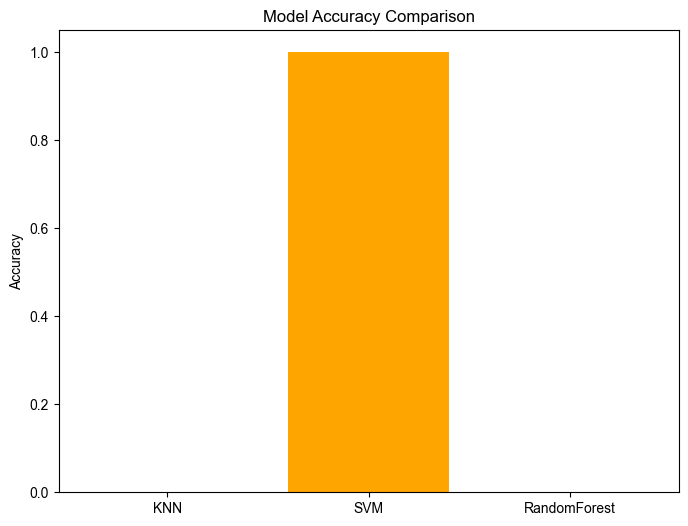

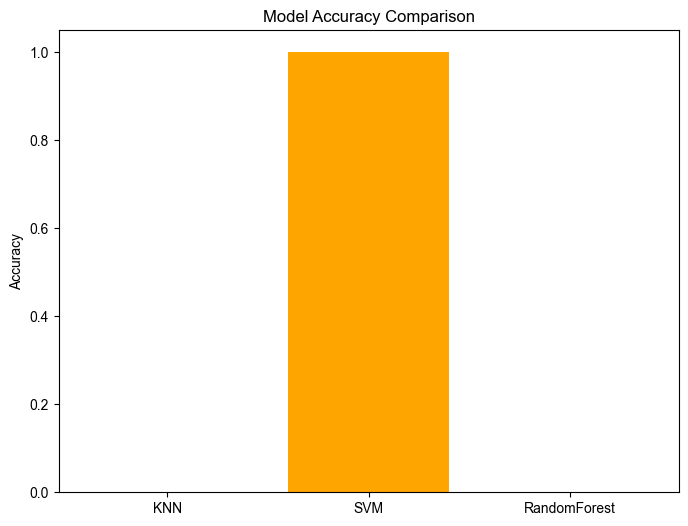

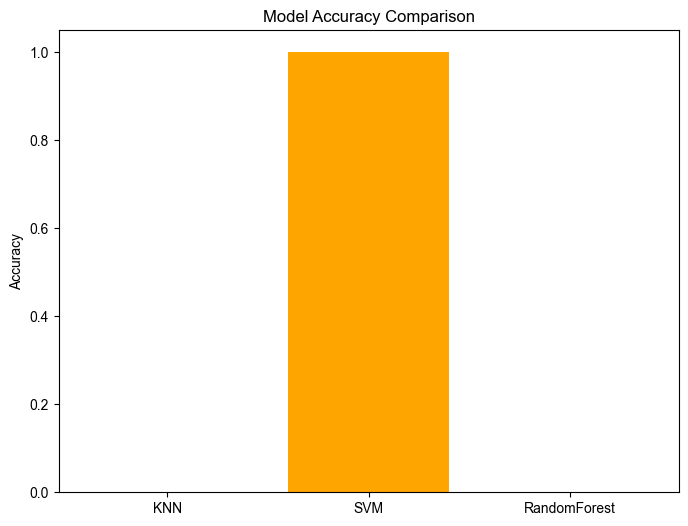

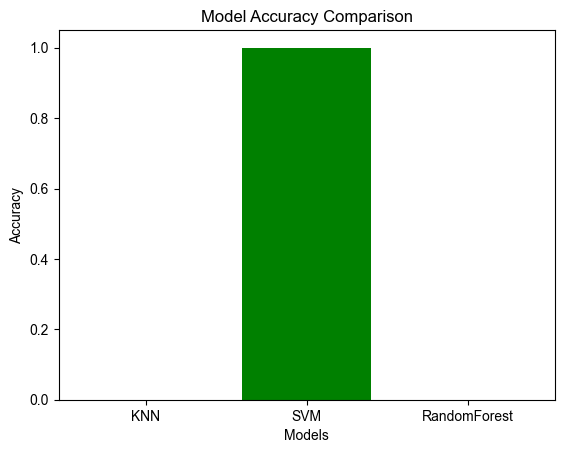

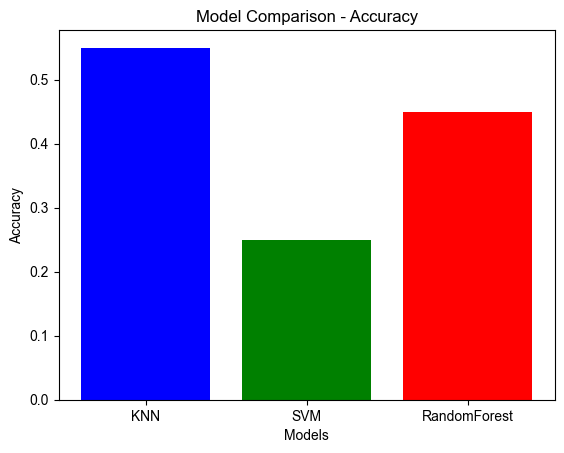

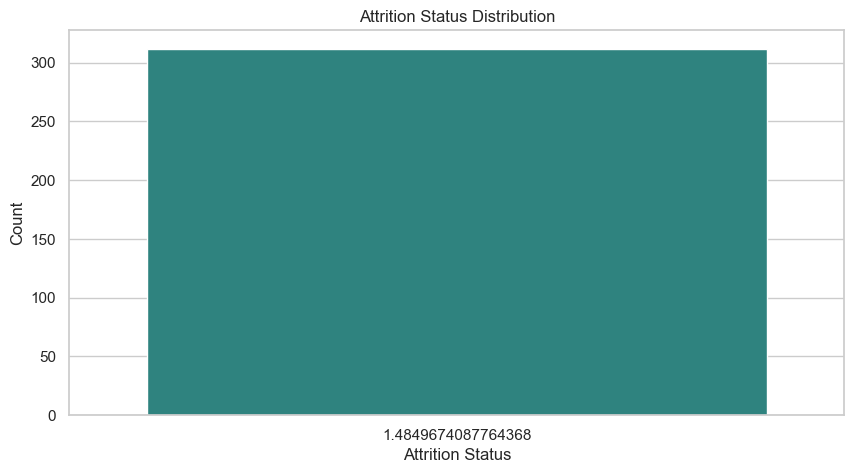

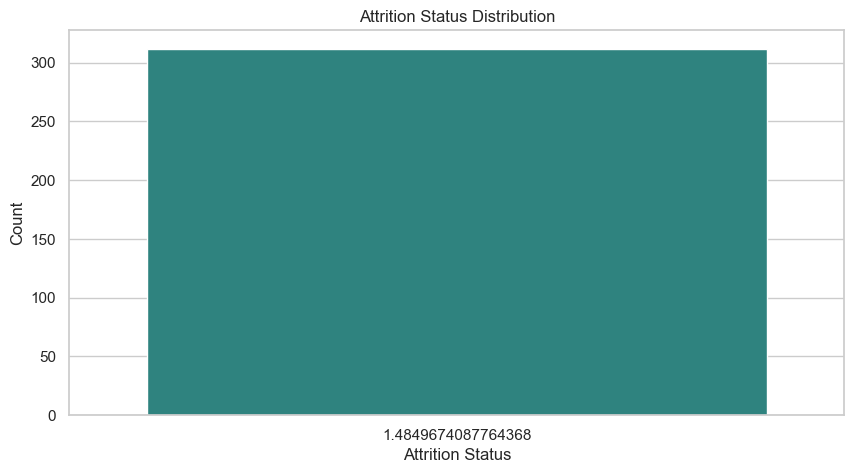

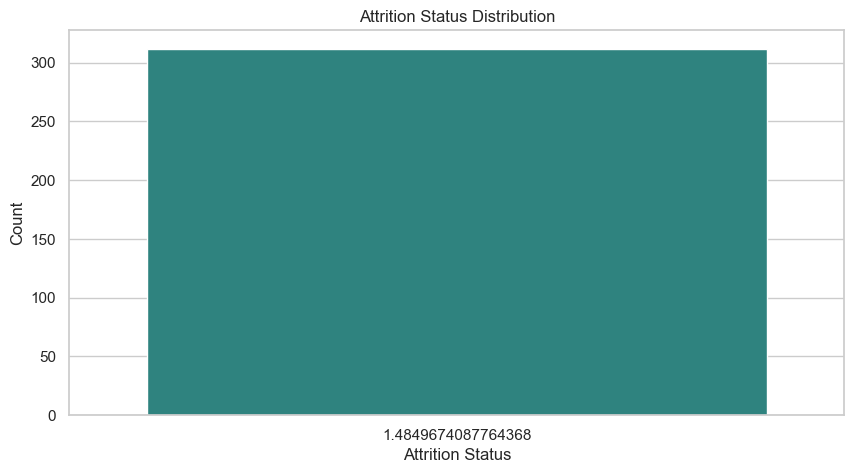

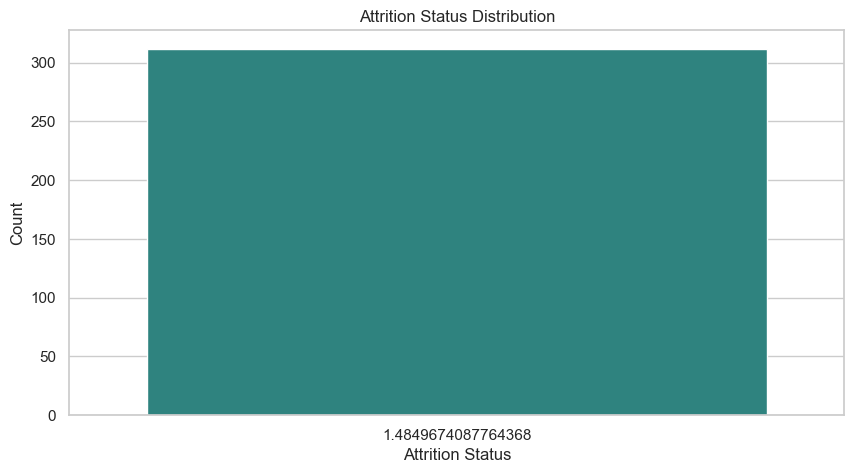

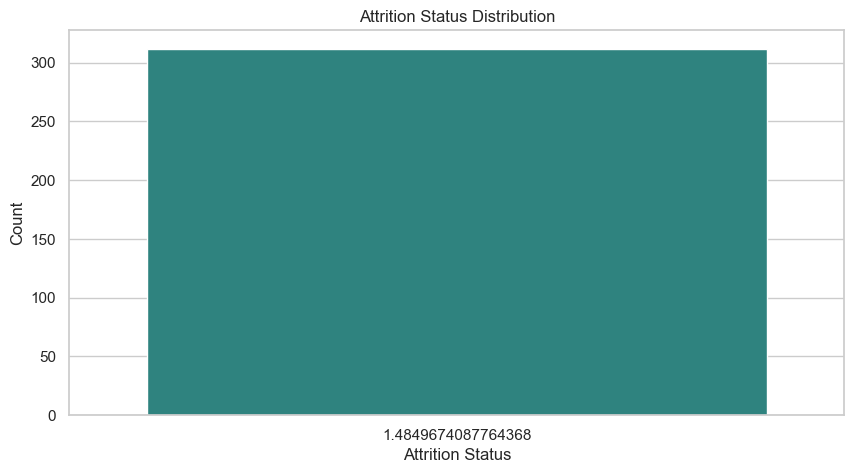

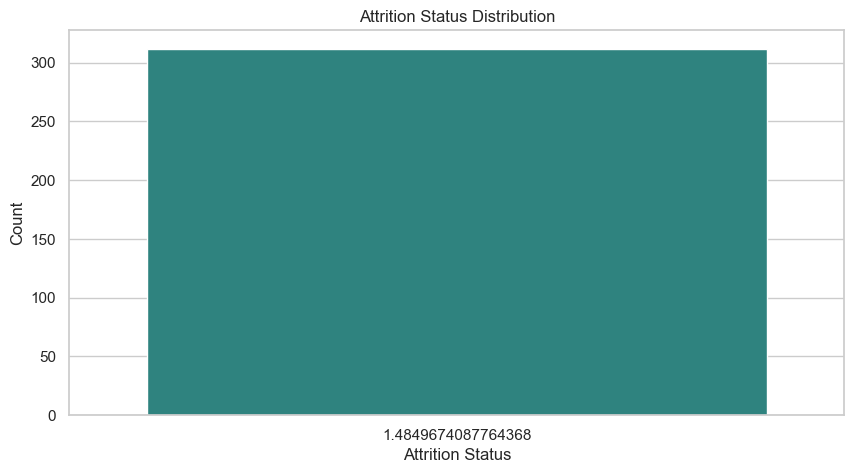

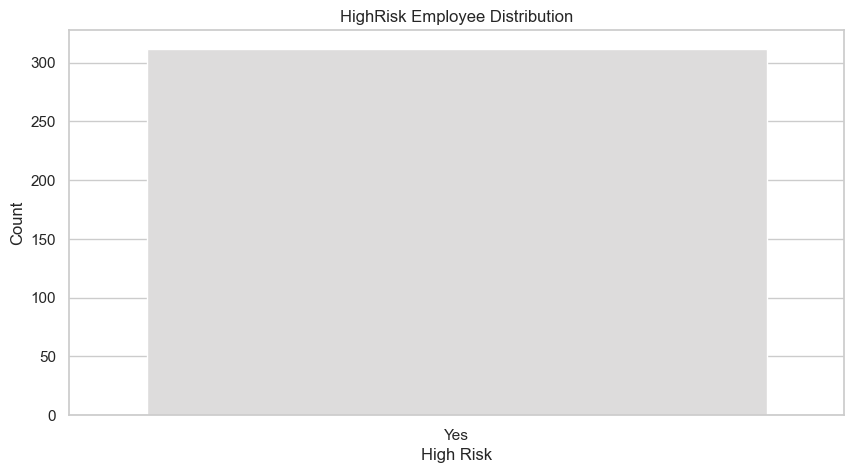

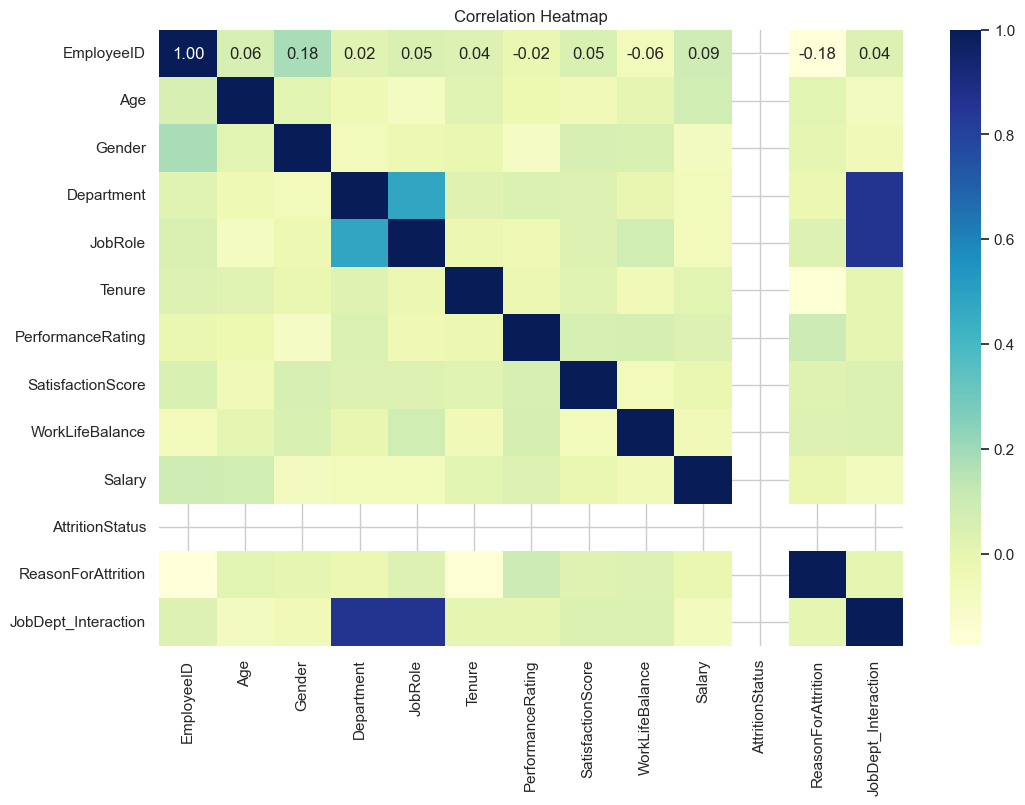

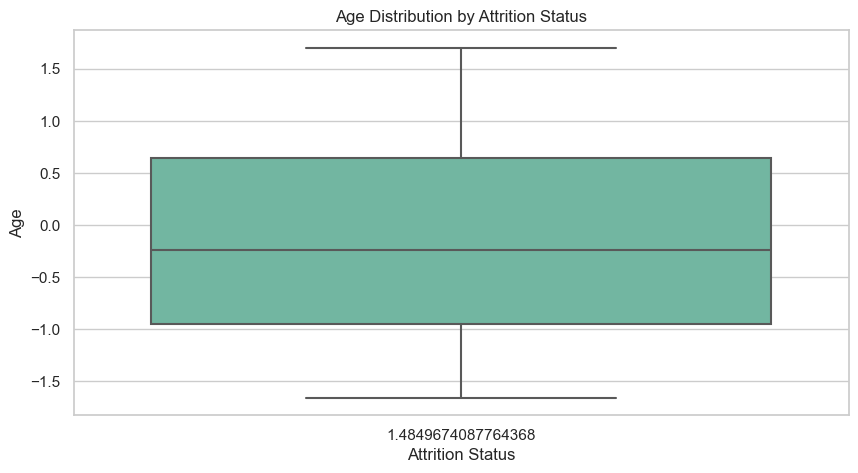

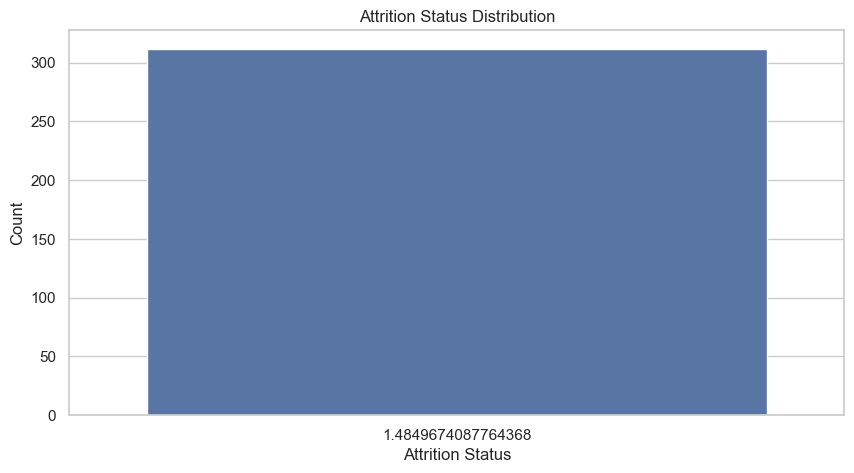

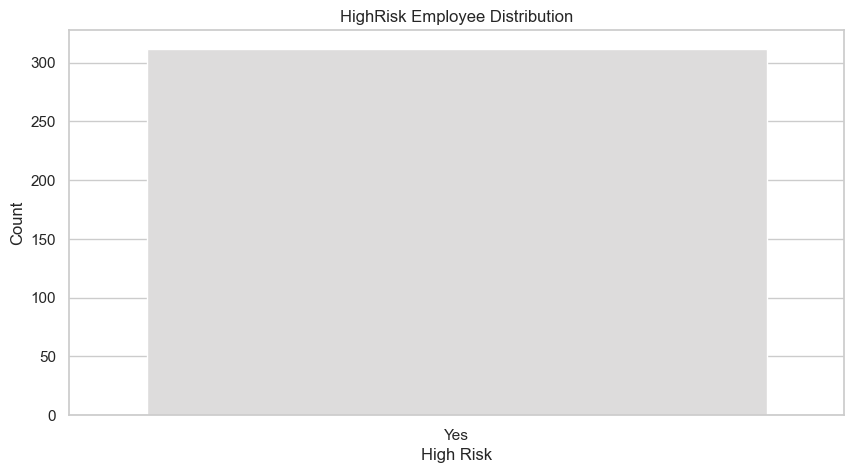

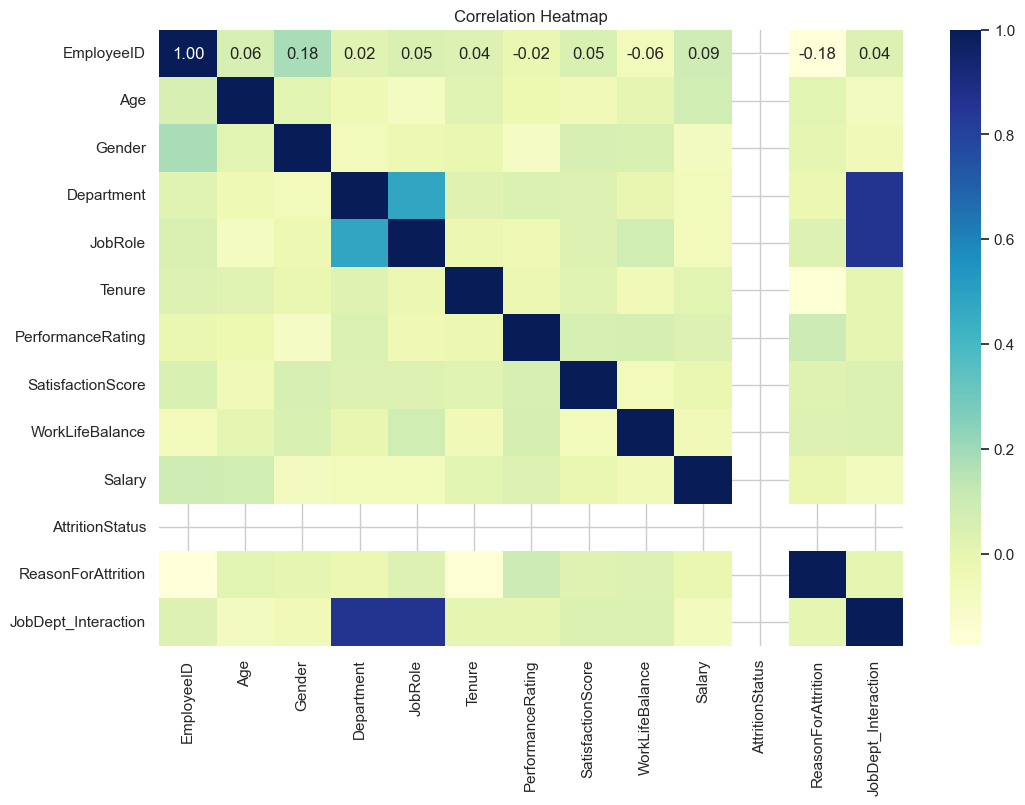

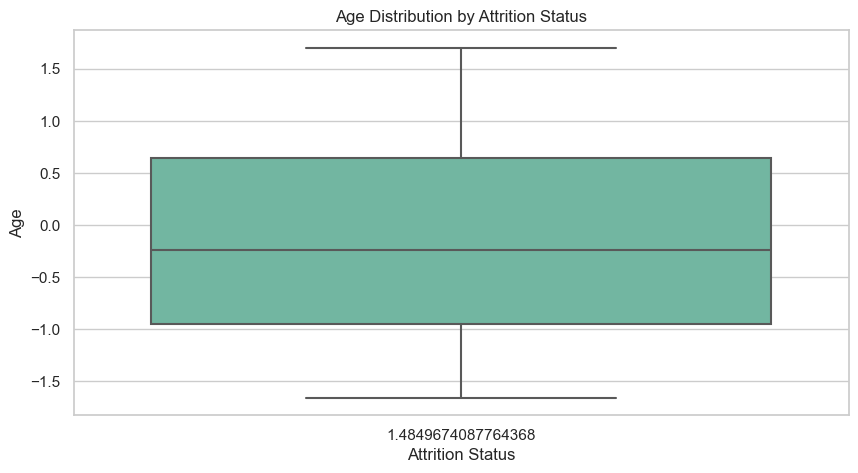

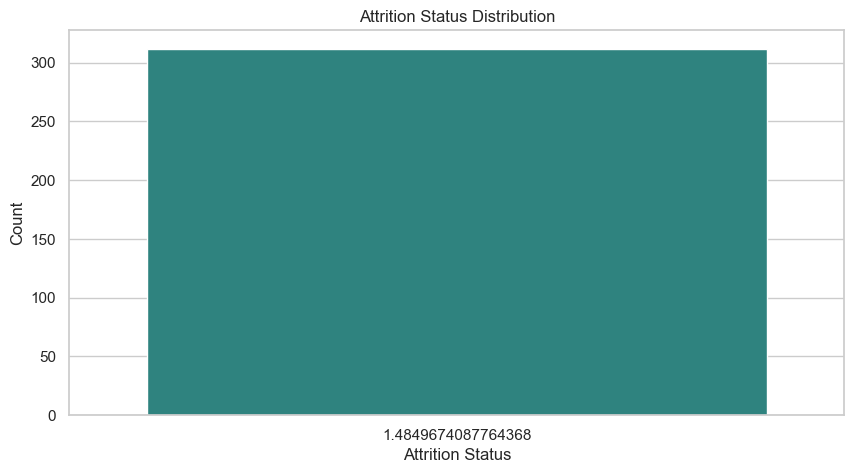

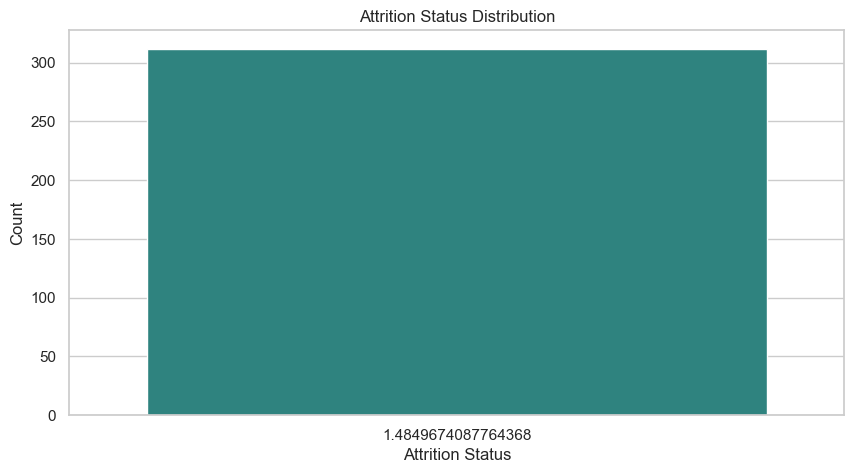

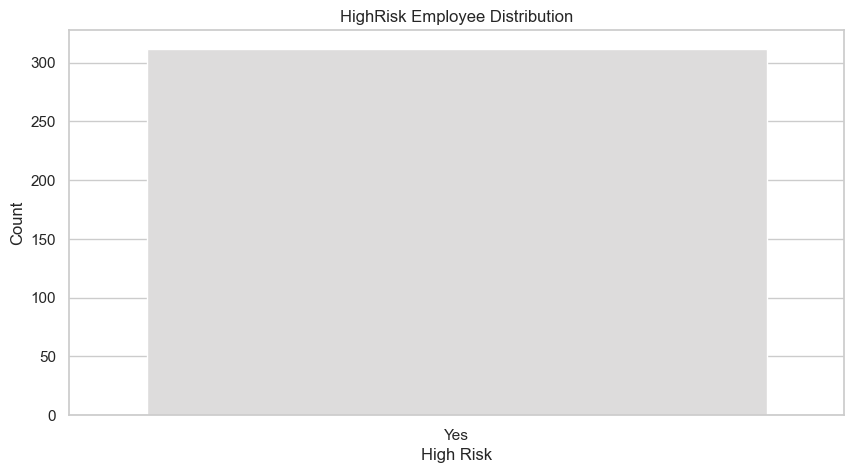

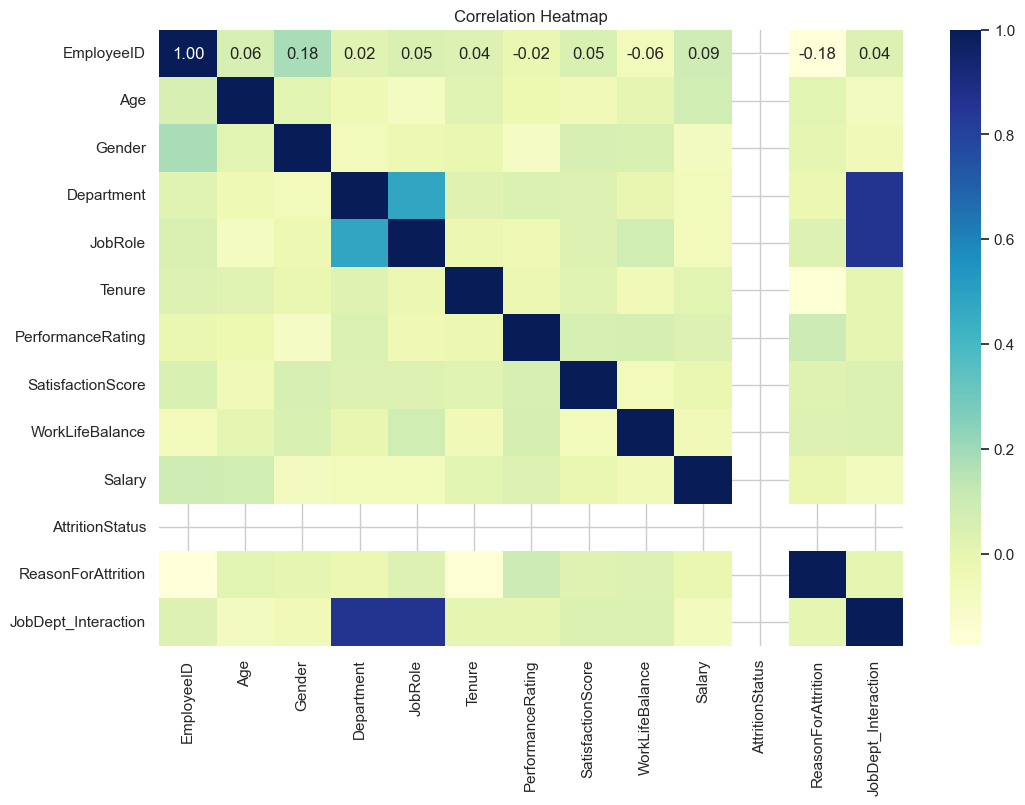

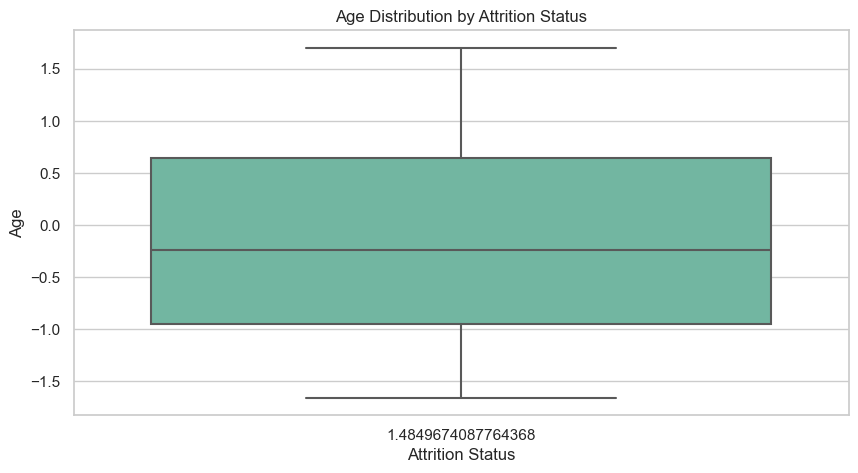

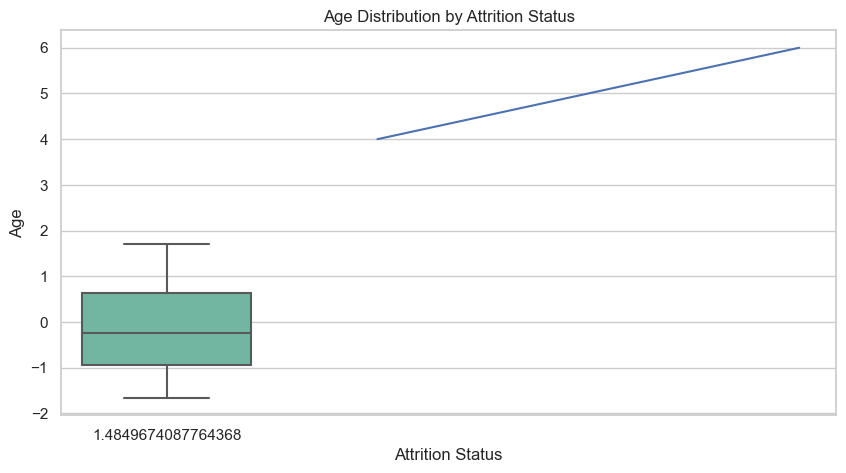

In [121]:
%matplotlib inline
import matplotlib.pyplot as plt

# Your plot code here
plt.plot([1, 2, 3], [4, 5, 6])
plt.show()